<a href="https://colab.research.google.com/github/julianovale/BB_Evolution/blob/main/0020_AluraBB_RedesNeurais_TreinandoRedeNeural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

args = {
    'batch_size': 20,
    'num_workers': 4,
    'num_classes': 10,
    'lr': 1e-4,
    'weight_decay': 5e-4,
    'num_epochs': 30
}

if torch.cuda.is_available():
  args['device'] = torch.device('cuda')
else:
  args['device'] = torch.device('cpu')

print(args['device'])

cuda


In [4]:
train_set = datasets.MNIST('./', # como vou fazer o download do dataset, uso esse notação para salvar na raiz
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_set = datasets.MNIST('./', # como vou fazer o download do dataset, uso esse notação para salvar na raiz
                           train=False,
                           transform=transforms.ToTensor(),
                           download=False)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
print("Amostras de treino: ", str(len(train_set)))
print("Amostras de teste: ", str(len(test_set)))

Amostras de treino:  60000
Amostras de teste:  10000


In [6]:
print(type(train_set))
print(type(train_set[0])) # Tupla: (dado, rótulo)

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


In [8]:
print(train_set[0]) # vou ver os níveis de cinza e o rótulo

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([20, 1, 28, 28]) torch.Size([20])


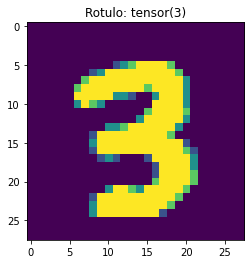

In [44]:
for batch in train_loader:
  
  dado, rotulo = batch
  print(dado.size(), rotulo.size())

  plt.imshow(dado[0][0])
  plt.title('Rotulo: '+ str(rotulo[0]) )
  break

In [45]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers']
                          ) 

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True,
                          num_workers=args['num_workers']
                          ) 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([20, 1, 28, 28]) torch.Size([20])


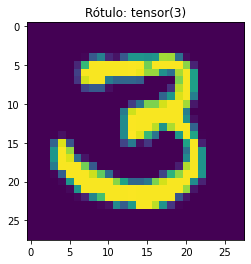

In [46]:
for batch in train_loader:
  
  dado, rotulo = batch
  print(dado.size(), rotulo.size()) # 20 amostras, 1 canal de cor, 28 pixels (linha), 28 pixels (coluna)
  plt.imshow(dado[0][0])
  plt.title('Rótulo: '+str(rotulo[0]))

  break

In [47]:
class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super(MLP, self).__init__()

    self.features  = nn.Sequential(
                      nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU()
                    )
    self.out     = nn.Linear(hidden_size, out_size)
    self.softmax = nn.Softmax()

  def forward(self, X):
    
    X = X.view(X.size(0), -1)

    feature = self.features(X)
    output  = self.softmax(self.out(feature))

    return output

input_size  = 28 * 28
hidden_size = 128
out_size    = 10 #classes

torch.manual_seed(42)
net = MLP(input_size, hidden_size, out_size).to(args['device']) #cast na GPU

In [48]:
criterion = nn.CrossEntropyLoss().to(args['device'])
optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])

In [49]:
for epoch in range(args['num_epochs']):

  epoch_loss = []
  for batch in train_loader:
    
    dado, rotulo = batch

    dado = dado.to(args['device']) 
    rotulo = rotulo.to(args['device']) 

    pred = net(dado)
    loss = criterion(pred, rotulo)
    epoch_loss.append(loss.cpu().data)

    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)

  print("Época: %d, Loss: %.4f +\- %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std()))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Época: 0, Loss: 1.7318 +\- 0.1551
Época: 1, Loss: 1.6458 +\- 0.0869
Época: 2, Loss: 1.6480 +\- 0.0880
Época: 3, Loss: 1.6949 +\- 0.0956
Época: 4, Loss: 1.7068 +\- 0.0962
Época: 5, Loss: 1.7625 +\- 0.1084
Época: 6, Loss: 1.8924 +\- 0.1147
Época: 7, Loss: 1.9745 +\- 0.1139
Época: 8, Loss: 1.9440 +\- 0.1145
Época: 9, Loss: 2.0225 +\- 0.1115
Época: 10, Loss: 2.0820 +\- 0.1118
Época: 11, Loss: 2.2032 +\- 0.1058
Época: 12, Loss: 2.3171 +\- 0.0791
Época: 13, Loss: 2.3428 +\- 0.0714
Época: 14, Loss: 2.3425 +\- 0.0713
Época: 15, Loss: 2.3424 +\- 0.0726
Época: 16, Loss: 2.3421 +\- 0.0713
Época: 17, Loss: 2.3420 +\- 0.0711
Época: 18, Loss: 2.3418 +\- 0.0721
Época: 19, Loss: 2.3416 +\- 0.0714
Época: 20, Loss: 2.3428 +\- 0.0720
Época: 21, Loss: 2.3453 +\- 0.0708
Época: 22, Loss: 2.3468 +\- 0.0709
Época: 23, Loss: 2.3477 +\- 0.0714
Época: 24, Loss: 2.3480 +\- 0.0718
Época: 25, Loss: 2.3483 +\- 0.0717
Época: 26, Loss: 2.3485 +\- 0.0702
Época: 27, Loss: 2.3487 +\- 0.0699
Época: 28, Loss: 2.3487 +\- 0.